In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

In [11]:
pyr_four = pd.read_csv('pyr_four_nostr.csv', index_col=[0])

In [12]:
pyr_four

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,1561,648518346349523993,300744,175376,57200,6.187842,20.482515,Basal,70864,42368,24,4778.608166,-648,-452,-238,825.137564,0,0
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,1362,648518346349523993,300344,174712,41280,18.720821,61.936882,Basal,70864,42368,24,4534.032201,-2290,-956,-687,2574.879609,0,0
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,749,648518346349523993,317512,191568,29680,1.382960,3.164067,Basal,70864,42368,24,10174.394134,-340,-300,-11,453.564769,0,0
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,23,648518346349523993,278952,171352,840,0.044947,0.283093,Somatic,70864,42368,24,1220.157777,-62,-46,-2,77.226938,0,1
5,2633343,363328,89636,57886,961,89434,57430,935,89878,58520,982,648518346349523993,358544,231544,38440,3.868432,10.566605,Basal,70864,42368,24,24373.638977,-444,-1090,-47,1177.898553,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210970,1649818,287444,72610,37220,2135,72356,37078,2095,72840,37450,2157,648518346349492130,290440,148880,85400,3.736330,15.210989,Somatic,72944,35952,2038,1314.834210,-484,-372,-62,613.582920,0,1
210971,2397704,336092,84174,56050,1975,83712,55254,1936,84612,56830,1992,648518346349492130,336696,224200,79000,4.604071,20.817940,Basal,72944,35952,2038,23022.738173,-900,-1576,-56,1815.740070,0,0
210972,1667802,337984,72740,46280,1200,72594,45918,1153,72916,46642,1248,648518346349492130,290960,185120,48000,3.541754,9.371107,Basal,72944,35952,2038,10363.949247,-322,-724,-95,798.050750,0,0
210973,1654227,495816,72104,39630,1908,72006,38894,1826,72178,40170,1940,648518346349492130,288416,158520,76320,5.980140,20.961437,Somatic,72944,35952,2038,3774.941589,-172,-1276,-114,1292.577270,0,0


# From Jose Portilla Machine Learning Course (Udemy)

# Train test split

In [13]:
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Tree

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
#dtree.fit(X_train,y_train)
#dtree.fit(X_train,y_train)
#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            presort=False, random_state=None, splitter='best')

TypeError: __init__() got an unexpected keyword argument 'presort'

In [18]:
# removed presort argument which caused an error
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

DecisionTreeClassifier()

# Prediction and evaluation 

In [19]:
predictions = dtree.predict(X_test)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.78      0.79      0.79      5970
      Axonal       0.72      0.74      0.73      3762
       Basal       0.85      0.84      0.84     16426
     Somatic       0.96      0.96      0.96     28114

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [22]:
print(confusion_matrix(y_test,predictions))

[[ 4741    75   928   226]
 [   91  2774   762   135]
 [  997   865 13801   763]
 [  237   155   766 26956]]


# Tree visualization
From Jose Portilla Machine Learning course on Udemy

In [23]:
#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.tree import export_graphviz
#import pydot 

#features = list(.columns[1:])
#features

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [25]:
# fixed error with deprecated sklearn.exterals.six
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO

In [26]:
features = list(pyr_four.columns[1:])
features

['mito_vx',
 'ctr_pos_x_vx',
 'ctr_pos_y_vx',
 'ctr_pos_z_vx',
 'bbox_beg_x_vx',
 'bbox_beg_y_vx',
 'bbox_beg_z_vx',
 'bbox_end_x_vx',
 'bbox_end_y_vx',
 'bbox_end_z_vx',
 'cellid',
 'ctr_pos_x_nm',
 'ctr_pos_y_nm',
 'ctr_pos_z_nm',
 'surface_area',
 'complexityindex',
 'compartment',
 'centroid_x',
 'centroid_y',
 'centroid_z',
 'ctr_distance_to_soma',
 'bbox_dir_x',
 'bbox_dir_y',
 'bbox_dir_z',
 'bbox_distance',
 'above_soma',
 'within_threshold_1500']

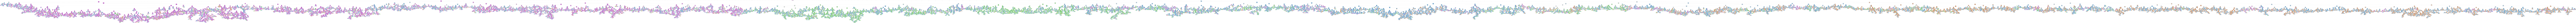

In [27]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Random forests

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(confusion_matrix(y_test,rfc_pred))

[[ 4710    25   986   249]
 [   44  2948   626   144]
 [  625   450 14708   643]
 [   51    13   349 27701]]


In [31]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.87      0.79      0.83      5970
      Axonal       0.86      0.78      0.82      3762
       Basal       0.88      0.90      0.89     16426
     Somatic       0.96      0.99      0.97     28114

    accuracy                           0.92     54272
   macro avg       0.89      0.86      0.88     54272
weighted avg       0.92      0.92      0.92     54272

